In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
import tensorflow as tf


In [2]:
vgg = tf.keras.applications.VGG16(
    input_shape=[100, 100, 3], include_top=False, weights='imagenet')

58889256/58889256 [==============================] - 0s 0us/step


In [3]:
x = Flatten()(vgg.output)
x = Dense(4, activation='sigmoid')(x)
model = Model(vgg.input, x)

In [4]:
def image_generator(batch_size=10):
  # generate image and targets
  while True:
    # Each epoch will have 50 batches. Why? No reason
    for _ in range(10):
      X = np.zeros((batch_size, 100, 100, 3))
      Y = np.zeros((batch_size, 4))

      for i in range(batch_size):
        # make the boxes and store their location in target
        row0 = np.random.randint(90)
        col0 = np.random.randint(90)
        row1 = np.random.randint(row0, 100)
        col1 = np.random.randint(col0, 100)
        X[i,row0:row1,col0:col1,:] = 1
        Y[i,0] = row0/100.
        Y[i,1] = col0/100.
        Y[i,2] = (row1 - row0)/100.
        Y[i,3] = (col1 - col0)/100.

      yield X, Y

In [5]:
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01))

In [21]:
model.fit_generator(
    image_generator(),
    steps_per_epoch=10,
    epochs=30,
)

Epoch 1/30


<ipython-input-21-54071e4cd9f5>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


10/10 [==============================] - 48s 5s/step - loss: 0.5379
Epoch 2/30
10/10 [==============================] - 47s 5s/step - loss: 0.5205
Epoch 3/30
10/10 [==============================] - 47s 5s/step - loss: 0.5218
Epoch 4/30
10/10 [==============================] - 47s 5s/step - loss: 0.5176
Epoch 5/30
10/10 [==============================] - 46s 5s/step - loss: 0.5082
Epoch 6/30
10/10 [==============================] - 47s 5s/step - loss: 0.5088
Epoch 7/30
10/10 [==============================] - 46s 5s/step - loss: 0.5336
Epoch 8/30
10/10 [==============================] - 47s 5s/step - loss: 0.5299
Epoch 9/30
10/10 [==============================] - 48s 5s/step - loss: 0.5437
Epoch 10/30
10/10 [==============================] - 47s 5s/step - loss: 0.5446
Epoch 11/30
10/10 [==============================] - 47s 5s/step - loss: 0.5227
Epoch 12/30
10/10 [==============================] - 46s 5s/step - loss: 0.5121
Epoch 13/30
10/10 [==============================] - 47s 5s/

In [22]:
from matplotlib.patches import Rectangle

# Make predictions
def make_prediction():
  # Generate a random image
  x = np.zeros((100, 100, 3))
  row0 = np.random.randint(90)
  col0 = np.random.randint(90)
  row1 = np.random.randint(row0, 100)
  col1 = np.random.randint(col0, 100)
  x[row0:row1,col0:col1,:] = 1
  print(row0, col0, row1, col1)

  # Predict
  X = np.expand_dims(x, 0)
  p = model.predict(X)[0]

  # Draw the box
  fig, ax = plt.subplots(1)
  ax.imshow(x)
  rect = Rectangle(
      (p[1]*100, p[0]*100),
      p[3]*100, p[2]*100,linewidth=1,edgecolor='r',facecolor='none')
  ax.add_patch(rect)
  plt.show()

51 44 90 73
1/1 [==============================] - 0s 129ms/step


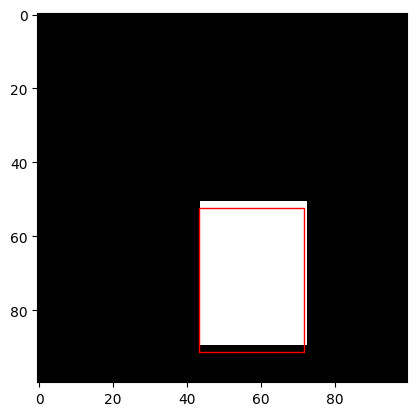

In [23]:
make_prediction()